### edge 
 - 영상에서 픽셀 밝기 값이 급격히 변하는 부분 (배경과객체, 객체와 객체의 경계)
 - 영상을 (x,y) 함수로 간주 했을 때, 1차 미분값이 크게 나타나는 부분
 - T값을 어떻게 주냐에 따라 검출O or  검출X
 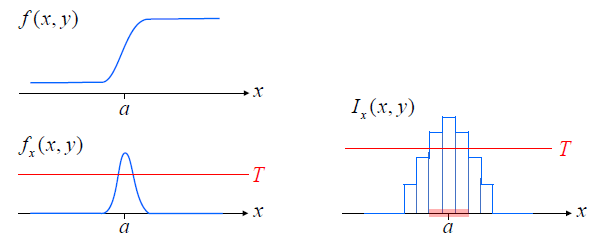
 

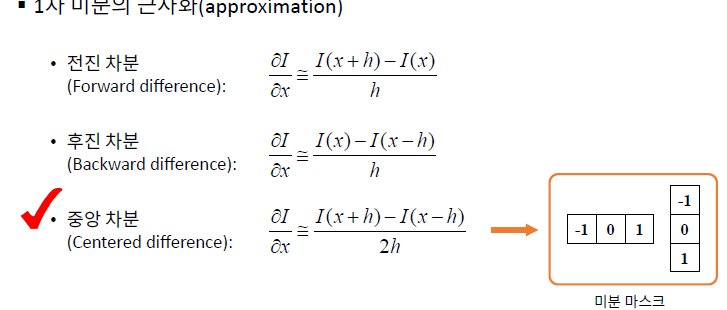
 - h : 1px 

**```cv2.Sobel(src,ddepth,dx,dy,dst=None,ksize=None,scale=None,delta=None,borderType=None) -> dst```**
 - ddepth : 출력영상타입, -1 이면 입력과 같은 데이터 타입
 - dx,dx : x,y 방향 미분 차수 (1차)
 - ksize : kernel size (3)
 - scale, delta : 연산결과에 추가적으로 곱할값 , 더할값. 기본값은 각각 1,0 
 - borderType : 가장자리 픽셀 확장 방식. (cv2.BORDER_DEFAULT)
 
**```cv2.Scharr(src,ddepth,dx,dy,dst=None,scale=None,delta=None,borderType=None) -> dst```**
 - ddepth : 출력영상타입, -1 이면 입력과 같은 데이터 타입
 - dx,dx : x,y 방향 미분 차수 (1차)
 - scale, delta : 연산결과에 추가적으로 곱할값 , 더할값. 기본값은 각각 1,0 
 - borderType : 가장자리 픽셀 확장 방식. (cv2.BORDER_DEFAULT)

In [2]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch06\\lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

dx = cv2.Sobel(src, -1, 1, 0, delta=128)
dy = cv2.Sobel(src, -1, 0, 1, delta=128)
'''delta 128을 줘서 saturation 되지 않게함
- 회색: 변화가 없는 부분
- 흰색: 값이 급격하게 증가한 부분
- 검은색: 값이 급격하게 감소한 부분
또한 Soble을 아래처럼 커널을 직접입력할 수도 있음
kernel = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]],
    dtype = np.float32)
dx2 = cv2.filter2D(src,-1,kernel,delta=128)
'''
cv2.imshow('src', src)
cv2.imshow('dx', dx)
cv2.imshow('dy', dy)
cv2.waitKey()

cv2.destroyAllWindows()


### Gradient of image
 - x,y 방향을 각각 구해서 하나의 벡터형태로 더한 것 
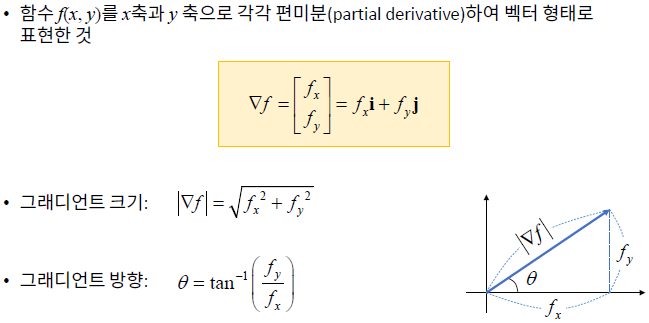
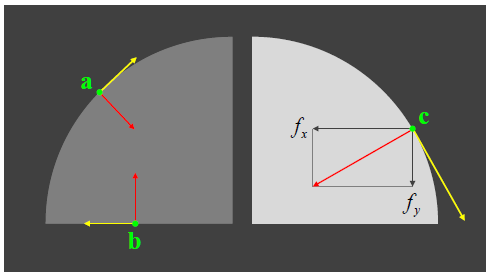
 - a,b의 크기(빨간색)는 같고 c의 크기가 더 크다 ( 더 밝아졌다)

**```cv2.magnitude(x,y,magnitude=None) ->magnitude```**
 - x,y : 2D 벡터의 x,y 좌표행렬(실수형)
 - magnitude : 2D 벡터의 크기 행렬

**```cv2.phase(x,y,angel=None,angleInDegrees=None) -> angle```**
 - x,y : 2D 벡터의 x,y 좌표행렬(실수형)
 - angle : 2D 벡터의 크기 행렬
 - angleInDegrees : True면 각도, False면 라디안

In [3]:
### edge with sobel filter
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch06\\lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

dx = cv2.Sobel(src, cv2.CV_32F, 1, 0)
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1)

mag = cv2.magnitude(dx, dy)
mag = np.clip(mag, 0, 255).astype(np.uint8)

dst = np.zeros(src.shape[:2], np.uint8)
dst[mag > 120] = 255 # T = 120
#_, dst = cv2.threshold(mag, 120, 255, cv2.THRESH_BINARY)

cv2.imshow('src', src)
cv2.imshow('mag', mag)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


### canny edge
 - good detection , good localization, single edge
#### 검출1단계 
 - 가우시안 필터링(잡음제거, optional)
#### 검출2단계 
 - 그래디언트 계산(sobel)
 - 방향성분은 4개 구역으로 단순화 
#### 검출3단계 
 - Non-Maximum Suppression (비최대 억제) 
   - 하나의 에지가 여러 개의 픽셀로 표현되는 현상을 없애기 위해 local maximum인 픽셀만을 에지 픽셀로 설정
     (두꺼운 에지가 아니라 한픽셀의 에지를 검출하겠다)
   - 그래디언트 방향에 위치한 2개의 픽셀을 조사하여 local maximum검사 
 
#### 검출4단계
 - hysteresis edge tracking
 - 2개의 임계점 (T_low, T_High)
   - T_low와 T_High 사이의 값들이 T_High와 연결이 되는 애들만 검출
 
 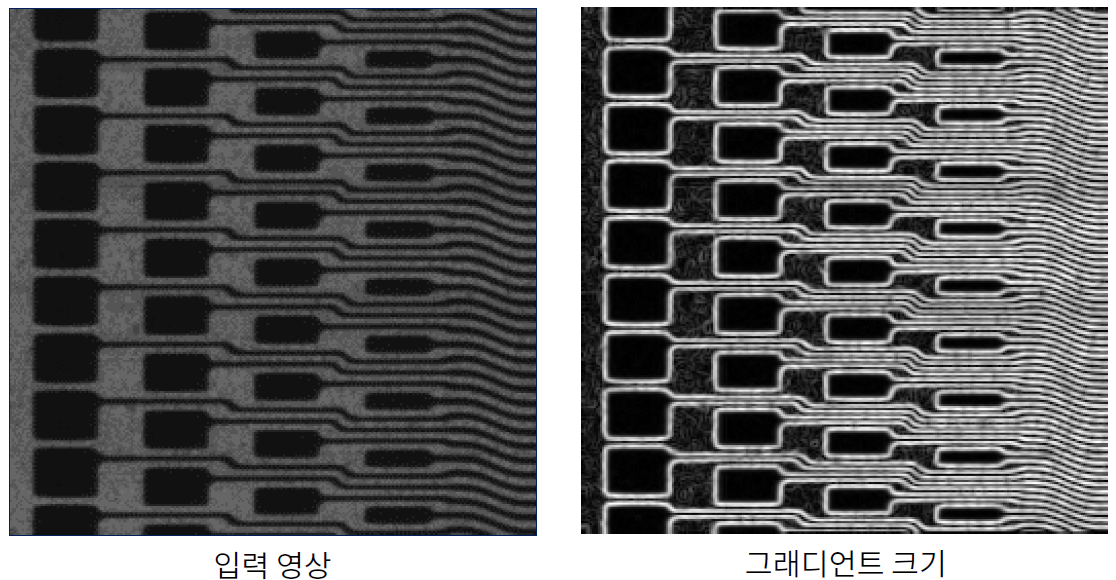
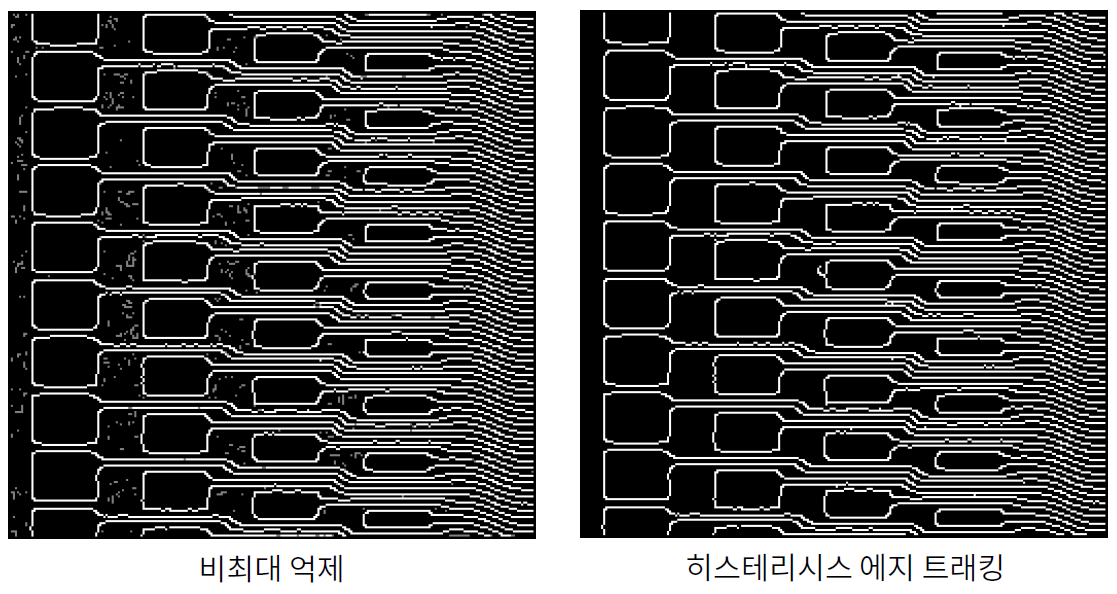

**``` cv2.canny(image, threshold1,threshold2, edges=None, apertureSize=None, L2gradient=None) -> edges ```**
 - image : 입력영상 
 - th1, th2 : 하단 임계값/ 상단 임계값
 - edges : 에지 영상 
 - apertureSize: 소벨 연산 커널 size , default 3
 - L2gradient : True (L2 norm) , False (L1 norm) , default L1
   - L2 = sqrt((dI/dx)^2+(dI/dy)^2) , L1 = abs|dI/dx| + abs|dI/dy|

In [ ]:
### edge with canny 
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch06\\building.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.Canny(src, 50, 150)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


### Hough transform (직선 검출) 
 - 2차원 영상 좌표에서 직선의 방정식을 파라미터 공간으로 변환하여 직선을 찾는 알고리즘
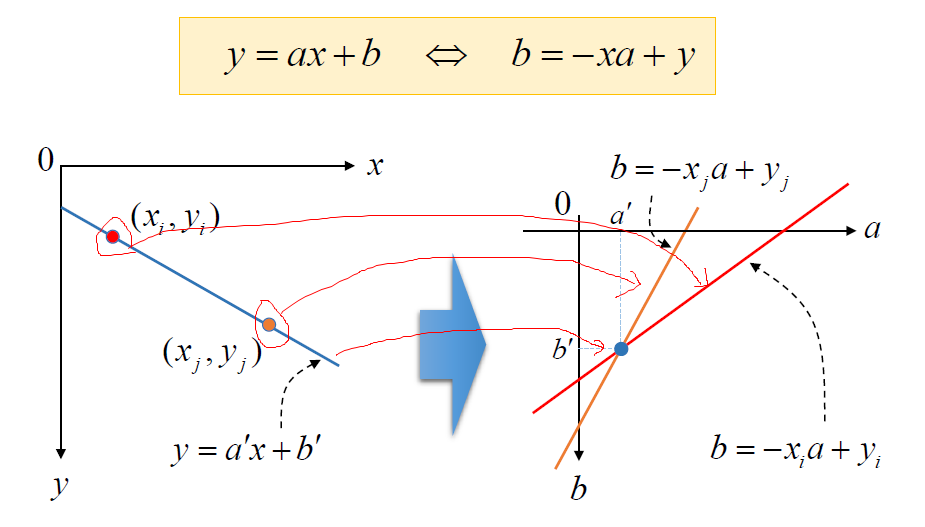
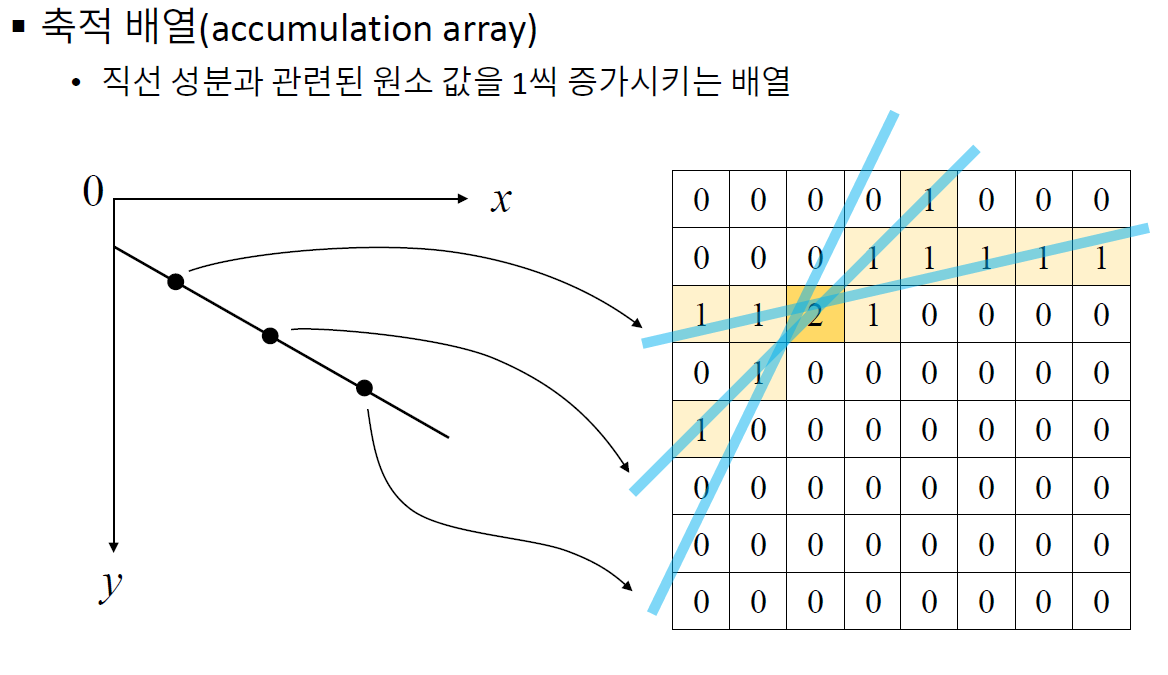
 - 직선방정식은 y축에 수직하는 방정식을 만들 수 없어서 극좌표계로 표현
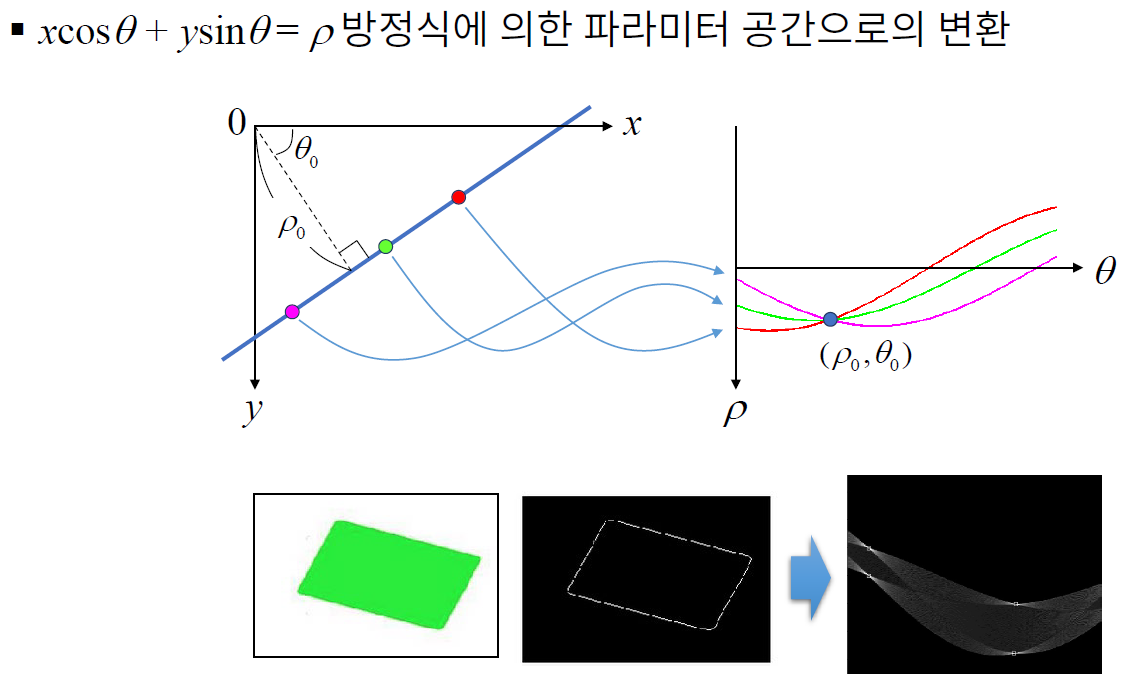

**``` cv2.HoughLines(image,rho,theta,threshold, lines=None, srn=None, stn=None, min_theta=None, max_theta=None)-> lines ```**
 - image: 입력 영상 
 - rho,theta : 축적배열에서 rho, theta 값의 간격 (1.0 , np.pi/180 기본) 
 - threshold : 직선으로 판단할 임계값 
 - lines : 직선 파라미터 정보를 담는 numpy.ndarray , shape=(N,1,2) dtype = numpy.float32
 - srn, stn : 멀티 스케일 허프 변환에서 rho 해상도, theta 해상도를 나누는 기본값은 0

**``` cv2.HoughLinesP(image,rho,theta,threshold, lines=None, srn=None, stn=None, min_theta=None, max_theta=None)-> lines ```**
 - image: 입력 영상 
 - rho,theta : 축적배열에서 rho, theta 값의 간격 (1.0 , np.pi/180 기본) 
 - threshold : 직선으로 판단할 임계값 
 - lines : 선분의 시작과 끝 좌표 (x1,y1), (x2,y2) 정보를 담는 담는 numpy.ndarray , shape=(N,1,4) dtype = numpy.int32
 - srn, stn : 멀티 스케일 허프 변환에서 rho 해상도, theta 해상도를 나누는 기본값은 0
 - minLineLength : 검출할 선분의 최소 길이 
 - maxLineGap : 직선으로 간주할 최대 에지 점 간격 ( 간격안에서 끊어져 있는 픽셀을 이어준다)  


In [1]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch06\\building.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

edges = cv2.Canny(src, 50, 150)

lines = cv2.HoughLinesP(edges, 1, np.pi / 180., 160,
                        minLineLength=50, maxLineGap=5)

dst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

if lines is not None:
    for i in range(lines.shape[0]):
        pt1 = (lines[i][0][0], lines[i][0][1])  # 시작점 좌표
        pt2 = (lines[i][0][2], lines[i][0][3])  # 끝점 좌표
        cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


### Hough transform (원 검출)
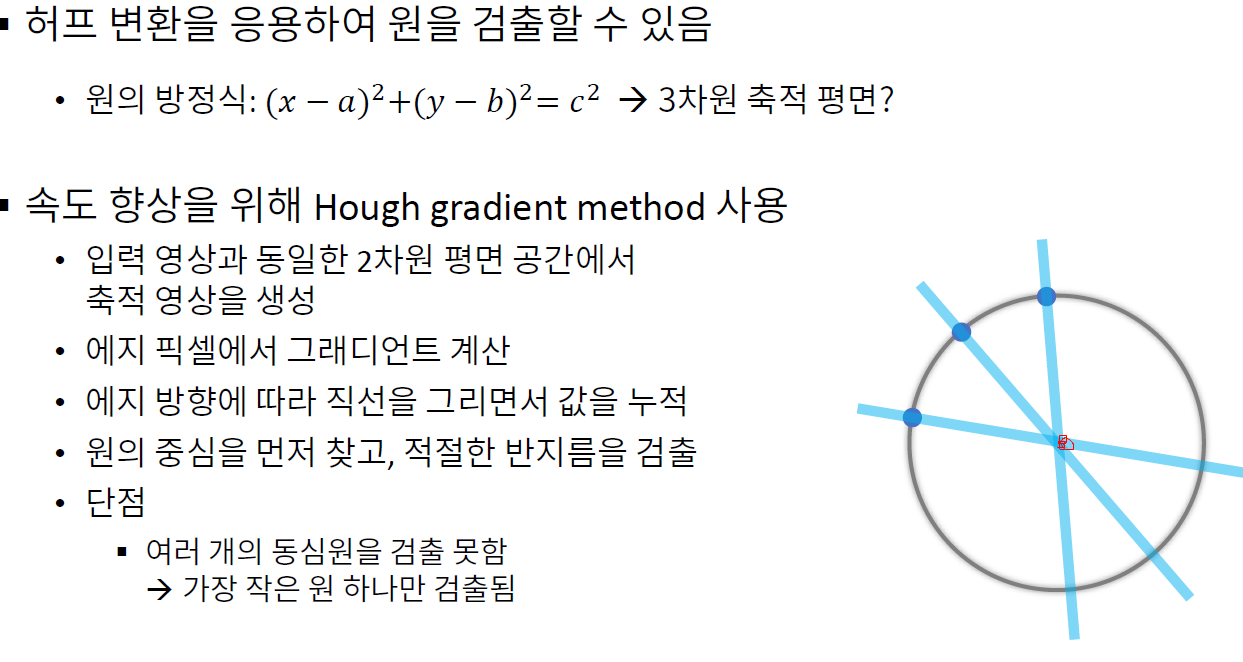


**``` cv2.HoughCircles(image, method, dp, minDist, circles=None, param1=None, param2=None, minRadius=None, maxRadius=None) ->circles```**
 - image : 입력영상(에지영상아님)
 - method : cv2.HOUGH_GRADIENT 
 - dp : 축적 배열의 크기 비율. 1이면 동일 크기 , 2면 가로/세로 크기가 입력 영상의 반 
 - minDist: 검출된 원 중심점들의 최소거리
 - circles: (cx,cy,r) 정보를 담은 np.ndarray. shape=(1,N,3) , dtype=np.float
 - param1 : canny 에지 검출기의 높은 임계값 
 - param2 : 축적 배열에서 원 검출을 위한 임계값
 - minRadius, maxRadius : 검출할 원의 최소, 최대 반지름 

In [2]:
import sys
import numpy as np
import cv2


# 입력 이미지 불러오기
src = cv2.imread('.\\ch06\\dial.jpg')

if src is None:
    print('Image open failed!')
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 1.0)


def on_trackbar(pos):
    rmin = cv2.getTrackbarPos('minRadius', 'img')
    rmax = cv2.getTrackbarPos('maxRadius', 'img')
    th = cv2.getTrackbarPos('threshold', 'img')

    circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50,
                               param1=120, param2=th, minRadius=rmin, maxRadius=rmax)

    dst = src.copy()
    if circles is not None:
        for i in range(circles.shape[1]):
            cx, cy, radius = np.uint16(circles[0][i])
            cv2.circle(dst, (cx, cy), radius, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('img', dst)


# 트랙바 생성
cv2.imshow('img', src)
cv2.createTrackbar('minRadius', 'img', 0, 100, on_trackbar)
cv2.createTrackbar('maxRadius', 'img', 0, 150, on_trackbar)
cv2.createTrackbar('threshold', 'img', 0, 100, on_trackbar)
cv2.setTrackbarPos('minRadius', 'img', 10)
cv2.setTrackbarPos('maxRadius', 'img', 80)
cv2.setTrackbarPos('threshold', 'img', 40)
cv2.waitKey()

cv2.destroyAllWindows()


error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\hough.cpp:2269: error: (-211:One of the arguments' values is out of range) acc_threshold must be a positive number in function 'cv::HoughCircles'


error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\hough.cpp:2269: error: (-211:One of the arguments' values is out of range) acc_threshold must be a positive number in function 'cv::HoughCircles'


### [실전코딩] 동전 카운터

In [3]:
import sys
import numpy as np
import cv2


# 입력 이미지 불러오기
src = cv2.imread('.\\ch06\\coins1.jpg')

if src is None:
    print('Image open failed!')
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 1)

# 허프 변환 원 검출
circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50,
                           param1=150, param2=40, minRadius=20, maxRadius=80)

# 원 검출 결과 및 동전 금액 출력
sum_of_money = 0
dst = src.copy()
if circles is not None:
    for i in range(circles.shape[1]):
        cx, cy, radius = np.uint16(circles[0][i])
        cv2.circle(dst, (cx, cy), radius, (0, 0, 255), 2, cv2.LINE_AA)

        # 동전 영역 부분 영상 추출
        x1 = int(cx - radius)
        y1 = int(cy - radius)
        x2 = int(cx + radius)
        y2 = int(cy + radius)
        radius = int(radius)
        
        crop = dst[y1:y2, x1:x2, :]
        ch, cw = crop.shape[:2]

        # 동전 영역에 대한 ROI 마스크 영상 생성
        mask = np.zeros((ch, cw), np.uint8)
        cv2.circle(mask, (cw//2, ch//2), radius, 255, -1)

        # 동전 영역 Hue 색 성분을 +40 시프트하고, Hue 평균을 계산
        hsv = cv2.cvtColor(crop, cv2.COLOR_BGR2HSV)
        hue, _, _ = cv2.split(hsv)
        hue_shift = (hue + 40) % 180
        mean_of_hue = cv2.mean(hue_shift, mask)[0]

        # Hue 평균이 90보다 작으면 10원, 90보다 크면 100원으로 간주
        won = 100
        if mean_of_hue < 90:
            won = 10

        sum_of_money += won

        cv2.putText(crop, str(won), (20, 50), cv2.FONT_HERSHEY_SIMPLEX,
                    0.75, (255, 0, 0), 2, cv2.LINE_AA)

cv2.putText(dst, str(sum_of_money) + ' won', (40, 80),
            cv2.FONT_HERSHEY_DUPLEX, 2, (255, 0, 0), 2, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()
